In [1]:
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:85% !important; }</style>"))

In [2]:
#import os
#import time
import datetime
#import numpy as np
#import pandas as pd

#from os import listdir
#from io import BytesIO
#import requests

import tensorflow as tf
#from tensorflow import keras
from tensorflow.keras import layers,models,utils
from tensorflow.keras.layers import Dense,Flatten
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import EarlyStopping,TensorBoard

#from scipy import stats
#from sklearn import preprocessing

#from sklearn.metrics import confusion_matrix
#from sklearn.metrics import roc_curve, auc

#import PIL
#from PIL import Image

#import seaborn as sns
#from matplotlib.pyplot import imshow
import matplotlib.pyplot as plt

if tf.test.gpu_device_name():
    print('Default GPU Device: {}'.format(tf.test.gpu_device_name()))
else:
    print("Please install GPU version of TF")

Default GPU Device: /device:GPU:0


In [3]:
DATA_DIR = 'data/caps_and_shoes_squared/'
IMAGE_SIZE = (28,28)
CLASS_LIST = ['cap','shoes']
BATCH_SIZE = 32

train_path = DATA_DIR + 'train'
validation_path = DATA_DIR + 'val'
test_path = DATA_DIR + 'test'

In [4]:
test_img_generator = ImageDataGenerator( rescale = 1./255)
img_generator = ImageDataGenerator(rescale = 1./255, rotation_range = 10, width_shift_range = 0.1, height_shift_range=0.1, zoom_range = 0.1, 
                                   horizontal_flip=True, fill_mode='nearest')
train_validation_img_generator = ImageDataGenerator(validation_split=0.2, rescale = 1./255, rotation_range = 10, width_shift_range = 0.1, height_shift_range=0.1, zoom_range = 0.1, 
                                   horizontal_flip=True, fill_mode='nearest')

train_partial_batches = train_validation_img_generator.flow_from_directory(train_path, target_size=IMAGE_SIZE, classes=CLASS_LIST, color_mode = 'grayscale', 
                                                  class_mode = 'categorical', batch_size=BATCH_SIZE, subset='training')

train_validation_batches = train_validation_img_generator.flow_from_directory(train_path, target_size=IMAGE_SIZE, classes=CLASS_LIST, color_mode = 'grayscale', 
                                                  class_mode = 'categorical', batch_size=BATCH_SIZE, subset='validation')

train_full_batches = img_generator.flow_from_directory(train_path, target_size=IMAGE_SIZE, classes=CLASS_LIST, color_mode = 'grayscale', 
                                                  class_mode = 'categorical', batch_size=BATCH_SIZE)

validation_batches = img_generator.flow_from_directory(validation_path, target_size=IMAGE_SIZE, classes=CLASS_LIST, color_mode = 'grayscale', 
                                                  class_mode = 'categorical', batch_size=BATCH_SIZE)
test_batches = test_img_generator.flow_from_directory(test_path, target_size=IMAGE_SIZE, classes=CLASS_LIST, color_mode = 'grayscale', 
                                                  class_mode = 'categorical',batch_size=1, shuffle=False)

Found 1832 images belonging to 2 classes.
Found 457 images belonging to 2 classes.
Found 2289 images belonging to 2 classes.
Found 670 images belonging to 2 classes.
Found 326 images belonging to 2 classes.


In [5]:
def define_model_architecture_64_32_16():
    model = models.Sequential()
    model.add(Flatten(input_shape = (28,28,1)))
    model.add(Dense(64, activation='relu'))
    model.add(Dense(32, activation='relu'))
    model.add(Dense(16, activation='relu'))
    model.add(Dense(2, activation='softmax'))
    
    model.compile(optimizer='sgd', loss='binary_crossentropy', metrics=['accuracy'])
    return model

In [8]:
es_callback = EarlyStopping(monitor='val_accuracy', mode='max', verbose=1, patience=50, min_delta=0.001, restore_best_weights = True)

In [13]:
!rm -rf ./logs/
log_dir="logs/fit/" + datetime.datetime.now().strftime("%Y%m%d-%H%M%S")
tb_callback = TensorBoard(log_dir=log_dir, histogram_freq=1)

In [9]:
model = define_model_architecture_64_32_16()
history = model.fit_generator(generator = train_partial_batches, steps_per_epoch=train_partial_batches.samples/BATCH_SIZE, 
                              validation_data = train_validation_batches, validation_steps = train_validation_batches.samples/BATCH_SIZE, 
                              epochs=200, verbose=2, workers=4, callbacks = [es_callback,tb_callback])

Epoch 1/200


W0816 18:59:06.899211 139674754565952 deprecation.py:323] From /home/algolaptop8/anaconda3/envs/tf2-env/lib/python3.7/site-packages/tensorflow/python/ops/math_grad.py:1250: add_dispatch_support.<locals>.wrapper (from tensorflow.python.ops.array_ops) is deprecated and will be removed in a future version.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


58/57 - 6s - loss: 0.6792 - accuracy: 0.5862 - val_loss: 0.6806 - val_accuracy: 0.6389
Epoch 2/200
58/57 - 5s - loss: 0.6412 - accuracy: 0.6457 - val_loss: 0.6524 - val_accuracy: 0.6630
Epoch 3/200
58/57 - 5s - loss: 0.6253 - accuracy: 0.6698 - val_loss: 0.6593 - val_accuracy: 0.6477
Epoch 4/200
58/57 - 5s - loss: 0.6222 - accuracy: 0.6523 - val_loss: 0.6357 - val_accuracy: 0.6630
Epoch 5/200
58/57 - 6s - loss: 0.6039 - accuracy: 0.6801 - val_loss: 0.6316 - val_accuracy: 0.6849
Epoch 6/200
58/57 - 6s - loss: 0.5956 - accuracy: 0.6971 - val_loss: 0.6333 - val_accuracy: 0.6937
Epoch 7/200
58/57 - 6s - loss: 0.6023 - accuracy: 0.6894 - val_loss: 0.6286 - val_accuracy: 0.6740
Epoch 8/200
58/57 - 6s - loss: 0.5915 - accuracy: 0.7003 - val_loss: 0.6425 - val_accuracy: 0.6652
Epoch 9/200
58/57 - 6s - loss: 0.5882 - accuracy: 0.6943 - val_loss: 0.6847 - val_accuracy: 0.6083
Epoch 10/200
58/57 - 6s - loss: 0.5917 - accuracy: 0.6818 - val_loss: 0.6038 - val_accuracy: 0.6871
Epoch 11/200
58/57 - 

Epoch 84/200
58/57 - 6s - loss: 0.4489 - accuracy: 0.7942 - val_loss: 0.5366 - val_accuracy: 0.7637
Epoch 85/200
58/57 - 6s - loss: 0.4547 - accuracy: 0.7920 - val_loss: 0.5114 - val_accuracy: 0.7659
Epoch 86/200
58/57 - 6s - loss: 0.4556 - accuracy: 0.7877 - val_loss: 0.4911 - val_accuracy: 0.8096
Epoch 87/200
58/57 - 6s - loss: 0.4562 - accuracy: 0.7806 - val_loss: 0.5059 - val_accuracy: 0.7768
Epoch 88/200
58/57 - 6s - loss: 0.4582 - accuracy: 0.7948 - val_loss: 0.4898 - val_accuracy: 0.7899
Epoch 89/200
58/57 - 6s - loss: 0.4643 - accuracy: 0.7822 - val_loss: 0.4530 - val_accuracy: 0.8140
Epoch 90/200
58/57 - 6s - loss: 0.4681 - accuracy: 0.7877 - val_loss: 0.4659 - val_accuracy: 0.8162
Epoch 91/200
58/57 - 6s - loss: 0.4545 - accuracy: 0.7904 - val_loss: 0.4561 - val_accuracy: 0.8074
Epoch 92/200
58/57 - 6s - loss: 0.4581 - accuracy: 0.7964 - val_loss: 0.4863 - val_accuracy: 0.7637
Epoch 93/200
58/57 - 5s - loss: 0.4349 - accuracy: 0.8002 - val_loss: 0.4830 - val_accuracy: 0.7877


Epoch 166/200
58/57 - 6s - loss: 0.3957 - accuracy: 0.8221 - val_loss: 0.4870 - val_accuracy: 0.7702
Epoch 167/200
Restoring model weights from the end of the best epoch.
58/57 - 6s - loss: 0.4141 - accuracy: 0.8122 - val_loss: 0.4382 - val_accuracy: 0.8096
Epoch 00167: early stopping


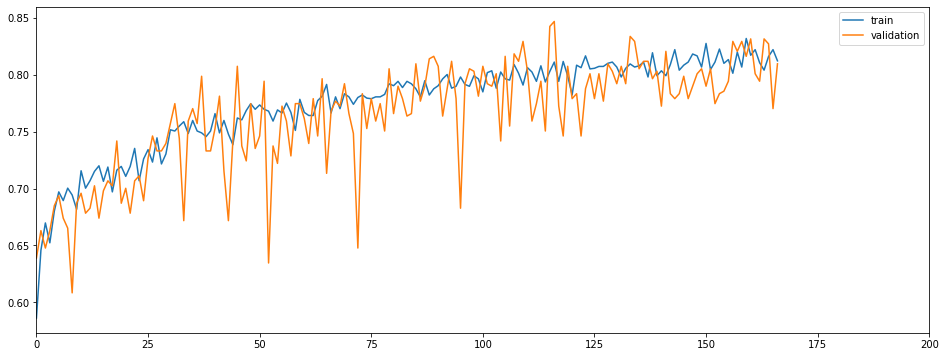

In [10]:
plt.figure(num=None, figsize=(16, 6))
plt.plot(history.history['accuracy'], label='train')
plt.plot(history.history['val_accuracy'], label='validation')
plt.legend()
plt.xlim(0, 200)
plt.show()

In [14]:
model = define_model_architecture_64_32_16()
history = model.fit_generator(generator = train_full_batches, steps_per_epoch=train_full_batches.samples/BATCH_SIZE, 
                              validation_data = validation_batches, validation_steps = validation_batches.samples/BATCH_SIZE, 
                              epochs=5, verbose=2, workers=4, callbacks = [es_callback,tb_callback])

Epoch 1/5
72/71 - 8s - loss: 0.6648 - accuracy: 0.6112 - val_loss: 0.6365 - val_accuracy: 0.6612
Epoch 2/5
72/71 - 8s - loss: 0.6285 - accuracy: 0.6588 - val_loss: 0.6082 - val_accuracy: 0.6776
Epoch 3/5
72/71 - 8s - loss: 0.6110 - accuracy: 0.6750 - val_loss: 0.5918 - val_accuracy: 0.6761
Epoch 4/5
72/71 - 8s - loss: 0.5997 - accuracy: 0.6898 - val_loss: 0.5909 - val_accuracy: 0.6866
Epoch 5/5
72/71 - 8s - loss: 0.6064 - accuracy: 0.6754 - val_loss: 0.6019 - val_accuracy: 0.6940


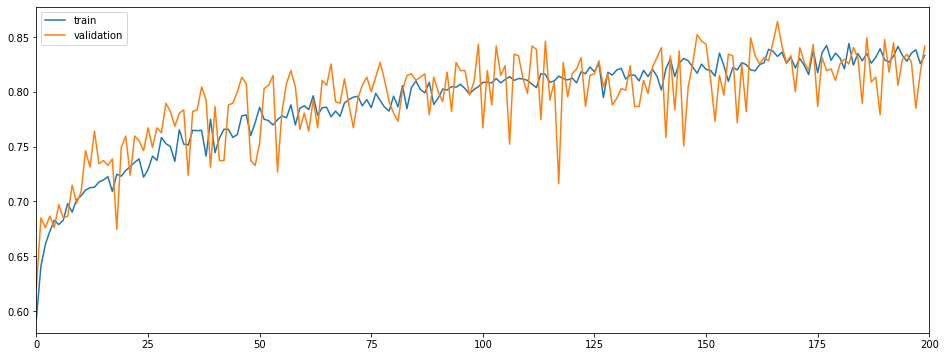

In [41]:
plt.figure(num=None, figsize=(16, 6))
plt.plot(history.history['accuracy'], label='train')
plt.plot(history.history['val_accuracy'], label='validation')
plt.legend()
plt.xlim(0, 200)
plt.show()